In [1]:
# Import all necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the data from local drive using pandas

url = 'https://drive.google.com/uc?id=17guGYlAjZ76v5XwtdBJsdwHvhKZQEE56'

# Make a copy
data = pd.read_csv(url)


In [3]:
# Display the first five rows to familiarize with data
data.head()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Patient_id,target
0,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,-11.396037,-19.976803,NaN,76.0,94.000000,17.0,116.0,36.388889,83.5,NaN,30552,0
1,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
2,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,-6.497052,18.0,116.0,36.388889,83.5,NaN,30552,0
3,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
4,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0


In [4]:
# display the size for the data

rows ,columns = data.shape
print(f'The Number of rows are:{rows}\nNo of columns are: {columns}')

The Number of rows are:300912
No of columns are: 19


In [5]:
# Check the data types of our dataframe

data.dtypes

,0
Capillary refill rate,float64
Diastolic blood pressure,float64
Fraction inspired oxygen,float64
Glascow coma scale eye opening,object
Glascow coma scale motor response,object
Glascow coma scale total,float64
Glascow coma scale verbal response,object
Glucose,float64
Heart Rate,float64
Height,float64


In [6]:
# categorical and Numerical  variables

#: Enumeration of Variables
categorical_vars = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = data.select_dtypes(include=['number']).columns.tolist()

binary_vars = [col for col in categorical_vars if data[col].nunique() == 2]
nominal_vars = [col for col in categorical_vars if col not in binary_vars]


print("Categorical Variables:", categorical_vars)
print("  Binary Variables:", binary_vars)
print("  Nominal Variables:", nominal_vars)
print("Numerical Variables:", numerical_vars)

Categorical Variables: ['Glascow coma scale eye opening', 'Glascow coma scale motor response', 'Glascow coma scale verbal response', 'Patient_id']
  Binary Variables: []
  Nominal Variables: ['Glascow coma scale eye opening', 'Glascow coma scale motor response', 'Glascow coma scale verbal response', 'Patient_id']
Numerical Variables: ['Capillary refill rate', 'Diastolic blood pressure', 'Fraction inspired oxygen', 'Glascow coma scale total', 'Glucose', 'Heart Rate', 'Height', 'Mean blood pressure', 'Oxygen saturation', 'Respiratory rate', 'Systolic blood pressure', 'Temperature', 'Weight', 'pH', 'target']


In [7]:
 #We will use describe method in pandas to carry out statistical description

data.describe()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,6336.000000,296944.000000,88464.000000,184416.000000,300698.000000,300912.000000,55824.000000,296984.00000,300912.000000,300864.000000,300912.000000,298848.000000,221040.000000,230614.000000,300912.000000
mean,0.219223,62.541099,0.599884,10.818123,130.628329,79.447793,168.543422,78.79108,95.343460,18.731265,119.694213,36.832834,82.969018,5.573617,0.142128
std,0.413753,341.559624,0.253919,4.334923,84.171126,32.145920,15.137414,29.52986,2529.203751,6.884248,23.396042,1.000075,26.765857,5.963634,0.349182
min,0.000000,0.000000,0.000000,3.000000,-19.999974,-19.999623,0.000000,-34.00000,-19.999687,0.000000,0.000000,0.000000,0.000000,-19.999706,0.000000
25%,0.000000,51.000000,0.400000,8.000000,101.000000,70.000000,160.000000,68.00000,95.000000,15.000000,103.000000,36.277802,66.600000,7.310000,0.000000
50%,0.000000,59.000000,0.500000,11.000000,126.000000,84.000000,170.000000,77.00000,98.000000,18.000000,117.000000,36.833333,79.099998,7.370000,0.000000
75%,0.000000,69.000000,0.700000,15.000000,158.000000,97.000000,178.000000,88.00000,100.000000,22.000000,134.000000,37.388889,94.699997,7.420000,0.000000
max,1.000000,100105.010000,7.100000,15.000000,9999.000000,941.000000,203.000000,9381.00000,981023.000000,1211.000000,295.000000,73.760002,931.224376,99.000000,1.000000


In [8]:
#  Initial Statistical Description
print("\nInitial Statistical Description of Numerical Variables:")
print(data[numerical_vars].describe())


Initial Statistical Description of Numerical Variables:
       Capillary refill rate  Diastolic blood pressure  \
count            6336.000000             296944.000000   
mean                0.219223                 62.541099   
std                 0.413753                341.559624   
min                 0.000000                  0.000000   
25%                 0.000000                 51.000000   
50%                 0.000000                 59.000000   
75%                 0.000000                 69.000000   
max                 1.000000             100105.010000   

       Fraction inspired oxygen  Glascow coma scale total        Glucose  \
count              88464.000000             184416.000000  300698.000000   
mean                   0.599884                 10.818123     130.628329   
std                    0.253919                  4.334923      84.171126   
min                    0.000000                  3.000000     -19.999974   
25%                    0.400000         

**Some Summary conclusion of our stastics above**

1. Capillary Refill Rate: Most values are 0, with a small mean (0.219) and a maximum of 1, indicating that this variable is often either 0 or 1,  binary.

2. Diastolic Blood Pressure: The mean diastolic pressure is around 62.5 mmHg, but the wide standard deviation (341.56) and an extreme maximum value (100,105 mmHg) suggest the presence of outliers or erroneous data. The median (59 mmHg) and interquartile range (51–69 mmHg) show a more typical range of values.

3. Fraction of Inspired Oxygen: This variable has a mean of 0.60 and ranges from 0 to 7.1, but the 75th percentile is 0.7, indicating that higher values might be outiers.

4. Glasgow Coma Scale Total: The mean is approximately 10.8, with a range of 3 to 15. The median is 11, showing that most patients are moderately conscious.

5. Heart Rate: The mean heart rate is around 79.45 bpm, with a standard deviation of 32.15 bpm. Extreme values, including a minimum of -20 bpm and a maximum of 941 bpm, indicate possible data entry errors.

6. Mean Blood Pressure: The mean is about 78.79 mmHg, with a large range from -34 to 9381 mmHg, indicating possible outliers or errors. The typical range is within the interquartile range (68–88 mmHg).

7. Oxygen Saturation: The mean oxygen saturation is 95.34%, but the standard deviation is very large (2529.20%), indicating significant outliers, as the median and interquartile range are within expected physiological limits (95–100).

8. Height: The mean height is approximately 168.54 cm, with a small standard deviation (15.14 cm). The interquartile range (160–178 cm) and maximum of 203 cm reflect typical adult height distribution.


In [20]:
print("\nStatistical Description of Categorical Variables:")
print(data[categorical_vars].describe())


Statistical Description of Categorical Variables:
       Glascow coma scale eye opening Glascow coma scale motor response  \
count                          274190                            296978   
unique                              7                                12   
top                   4 Spontaneously                  6 Obeys Commands   
freq                            94516                            115595   

       Glascow coma scale verbal response Patient_id  
count                              296884     300912  
unique                                 12       6269  
top                          1.0 ET/Trach      30552  
freq                                87646         48  


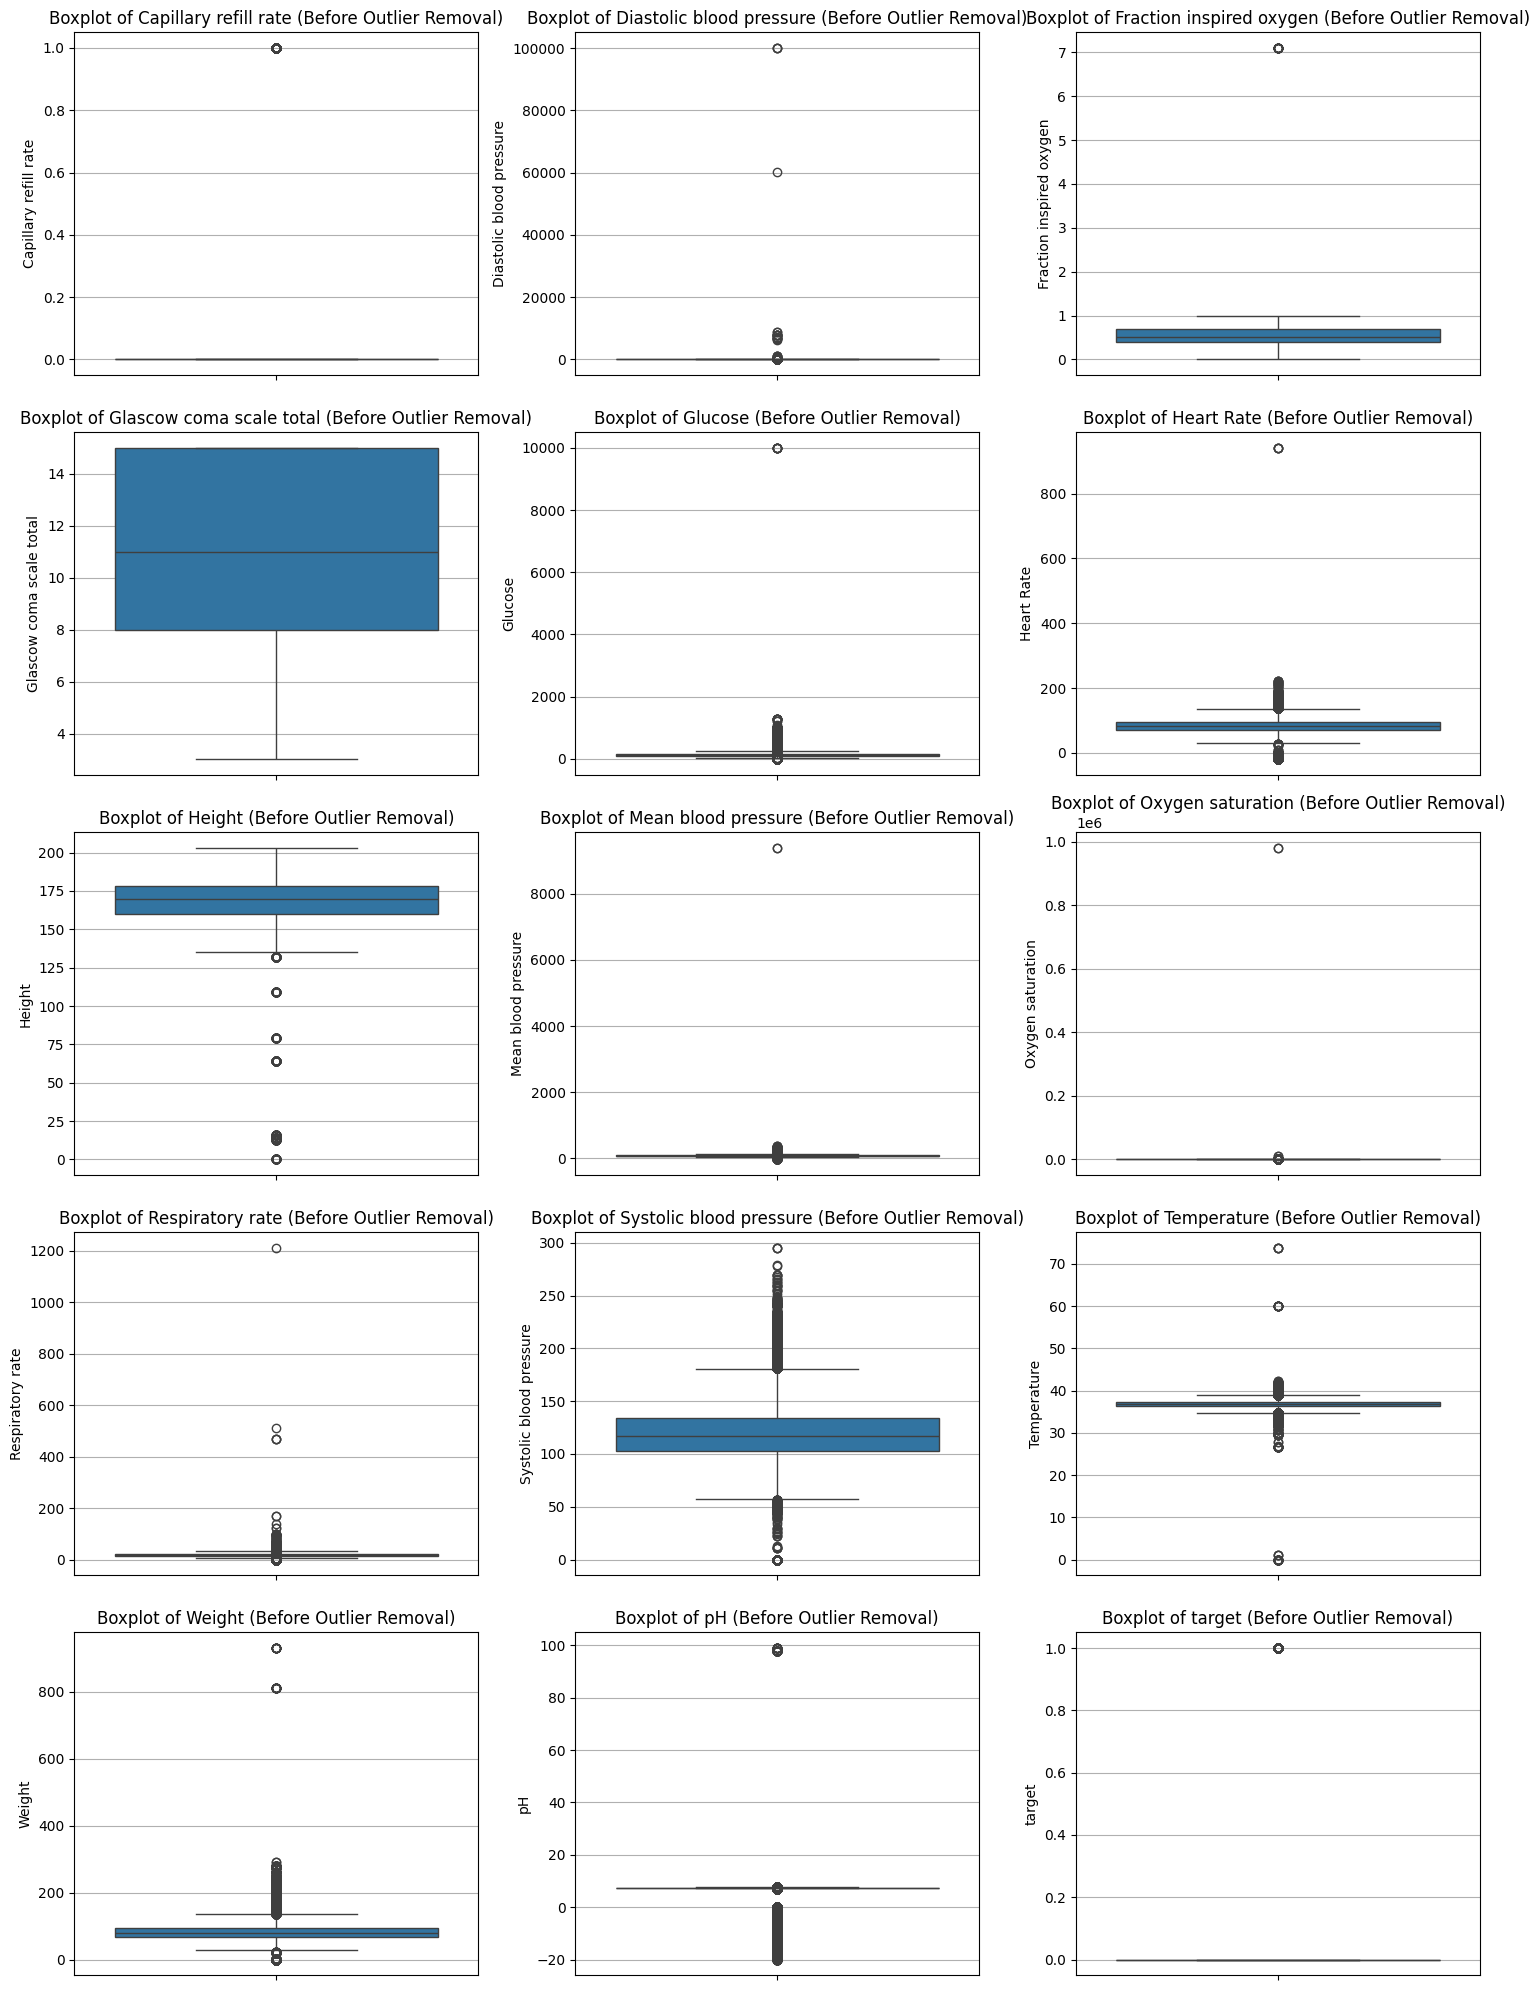

In [10]:
# Identify Outliers in Numerical Variables

n_cols = 3  # Number of columns per row
n_rows = (len(numerical_vars) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Loop through numerical variables and plot
for i, var in enumerate(numerical_vars):
    sns.boxplot(data[var], ax=axes[i])  # Use the corresponding axis
    axes[i].set_title(f"Boxplot of {var} (Before Outlier Removal)")
    axes[i].grid(axis='y')

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

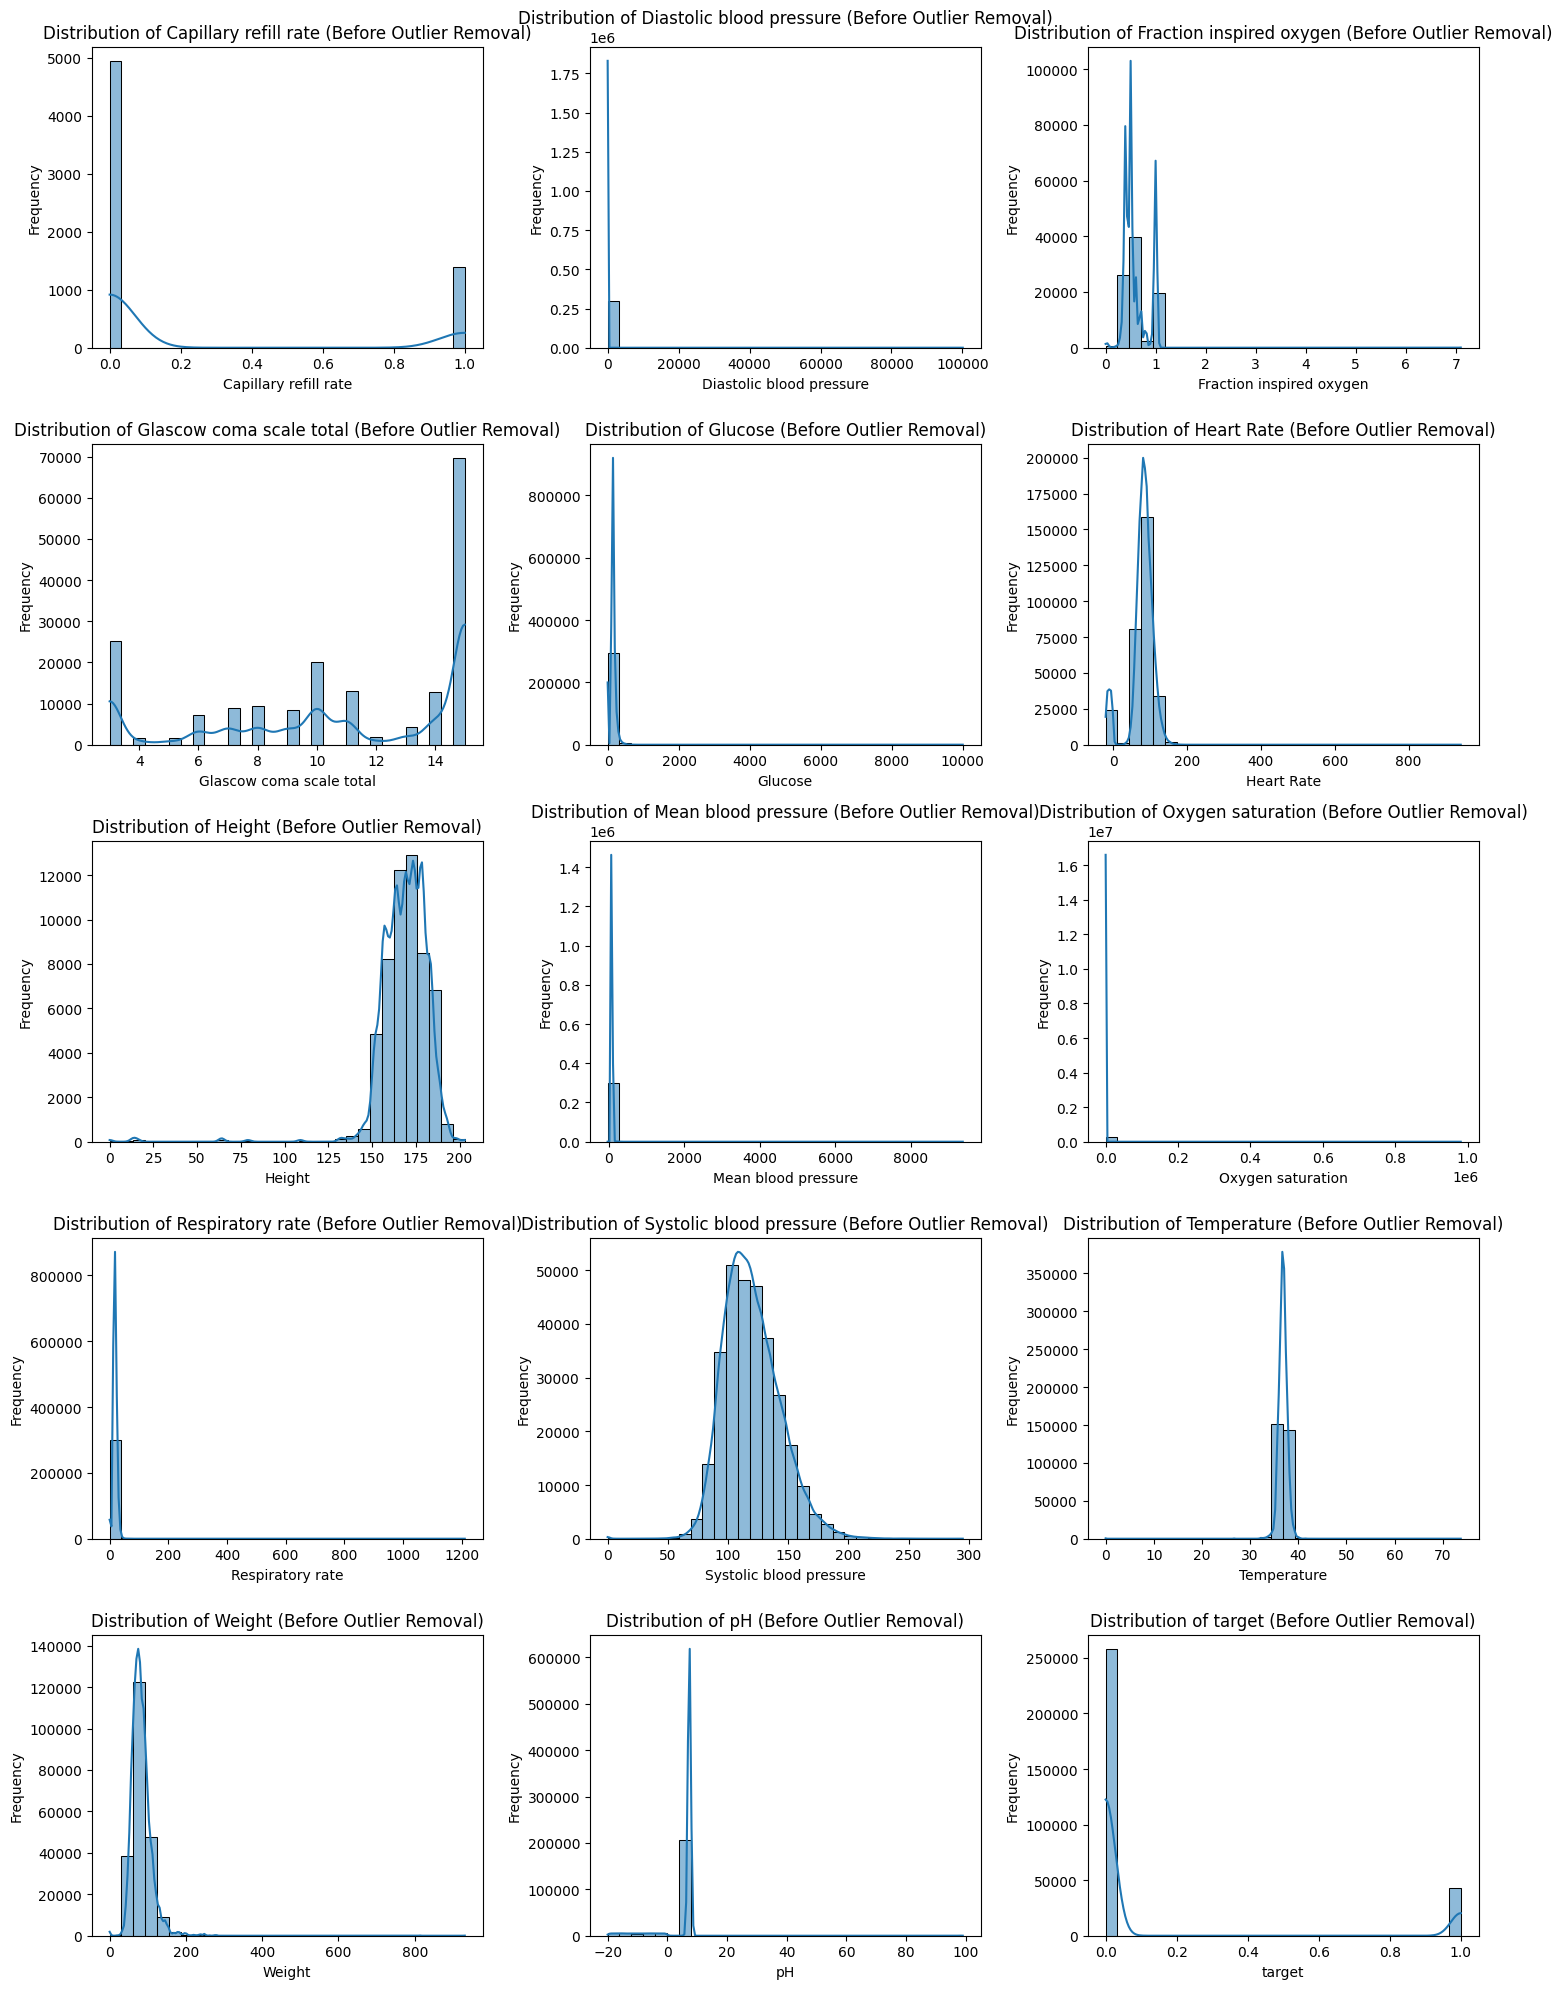

In [11]:
# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns per row
n_rows = (len(numerical_vars) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Loop through numerical variables and plot
for i, var in enumerate(numerical_vars):
    sns.histplot(data[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} (Before Outlier Removal)")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
#Handle Missing Values in Categorical Variables
print("\nMissing Values in Categorical Variables:")
print(data[categorical_vars].isnull().sum())

# Remove rows with missing categorical values
data_cleaned = data.dropna(subset=categorical_vars)


Missing Values in Categorical Variables:
Glascow coma scale eye opening        26722
Glascow coma scale motor response      3934
Glascow coma scale verbal response     4028
Patient_id                                0
dtype: int64


In [13]:
# updated statistical summary
print("Updated Statistical Summary:")
data_cleaned.describe()

Updated Statistical Summary:


,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,6083.000000,263517.000000,62943.000000,177338.000000,266912.000000,267046.000000,40351.000000,263578.000000,267046.000000,267000.000000,267046.000000,266660.000000,190624.000000,200553.000000,267046.000000
mean,0.219957,62.511197,0.587838,10.817106,129.952112,79.614573,167.951624,78.647057,92.390489,18.825975,119.631064,36.847284,82.968017,5.539033,0.137216
std,0.414251,362.220317,0.257704,4.337282,85.679760,32.236912,16.299060,30.651664,1898.624998,6.555684,23.342682,0.964192,26.498816,6.025718,0.344076
min,0.000000,0.000000,0.000000,3.000000,-19.999974,-19.999623,0.000000,-34.000000,-19.999687,0.000000,0.000000,0.000000,0.000000,-19.999706,0.000000
25%,0.000000,51.000000,0.400000,8.000000,100.000000,70.000000,160.000000,67.333298,95.000000,15.000000,103.000000,36.299999,66.500000,7.310000,0.000000
50%,0.000000,59.000000,0.500000,11.000000,125.000000,84.000000,170.000000,77.000000,98.000000,18.000000,117.000000,36.833335,79.099998,7.370000,0.000000
75%,0.000000,69.000000,0.700000,15.000000,157.000000,98.000000,178.000000,88.000000,100.000000,22.000000,134.000000,37.388901,94.599998,7.420000,0.000000
max,1.000000,100105.010000,7.100000,15.000000,9999.000000,941.000000,203.000000,9381.000000,981023.000000,510.000000,295.000000,73.760002,813.000000,99.000000,1.000000


In [14]:
#: Treat Outliers in Numerical Variables
from scipy.stats import zscore

# Calculate Z-scores to detect outliers
z_scores = np.abs(zscore(data_cleaned[numerical_vars]))
outlier_threshold = 3
outliers = (z_scores > outlier_threshold).any(axis=1)
print(f"\nNumber of rows with outliers: {outliers.sum()}")


Number of rows with outliers: 4974


In [15]:
# Remove rows with outliers
data_no_outliers = data_cleaned[~outliers]

print("\nShape of data after removing outliers:", )
print(data_no_outliers.shape)


Shape of data after removing outliers:
(262072, 19)


In [16]:
# Fill missing numerical values with mean
data_no_outliers[numerical_vars] = data_no_outliers[numerical_vars].fillna(data_no_outliers[numerical_vars].mean())


<ipython-input-16-d360b6d4b6cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers[numerical_vars] = data_no_outliers[numerical_vars].fillna(data_no_outliers[numerical_vars].mean())


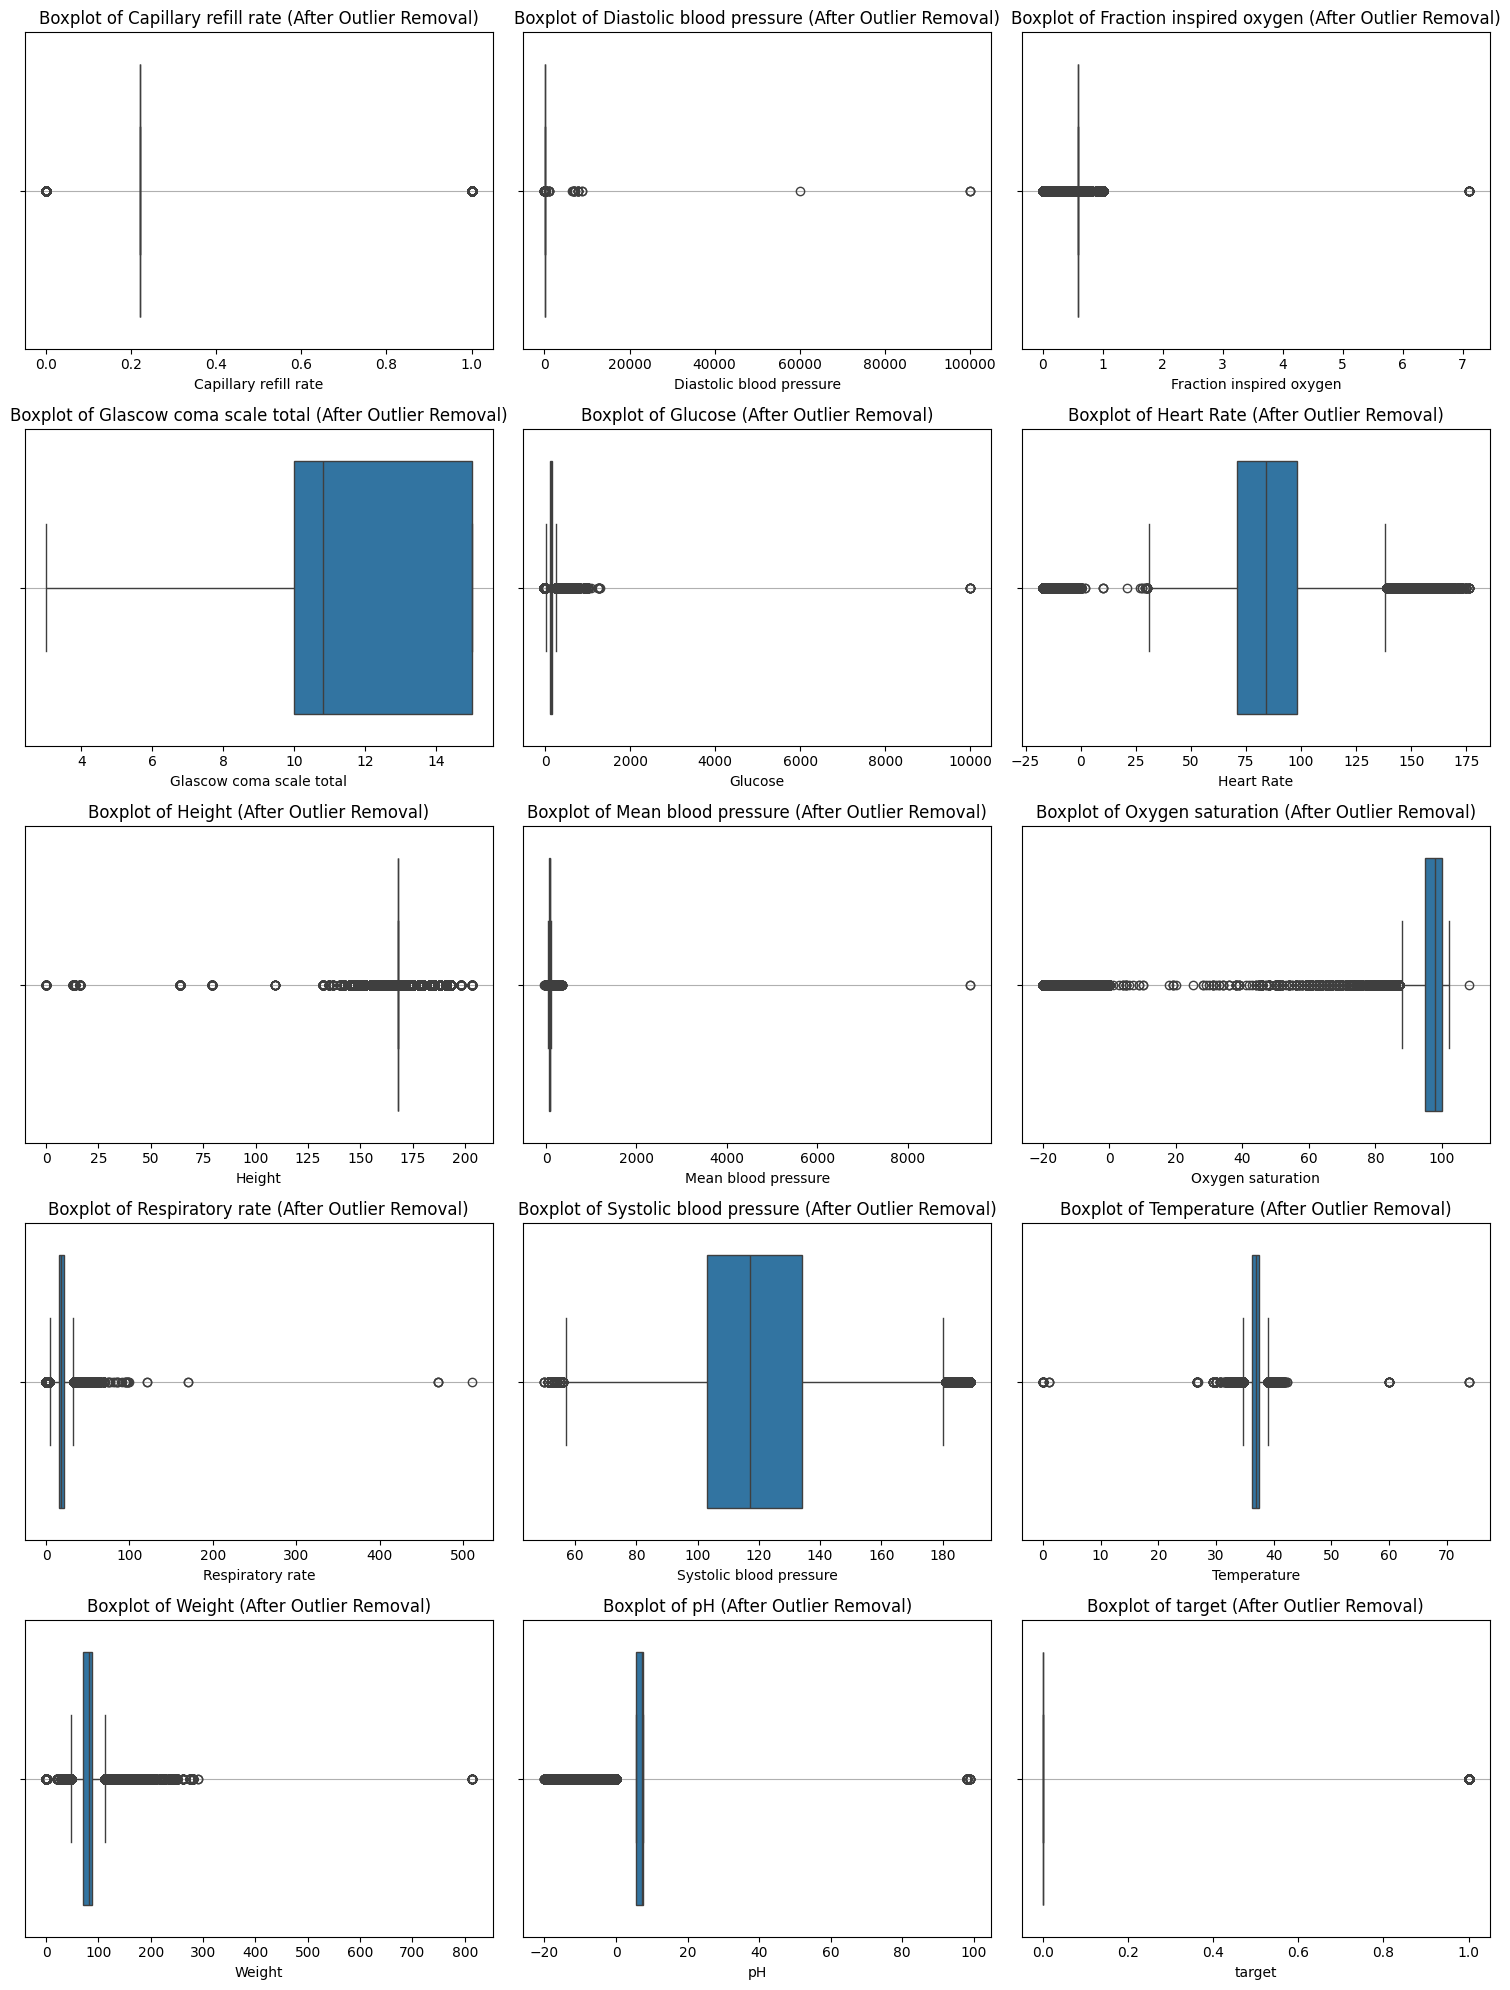

In [17]:
# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns per row
n_rows = (len(numerical_vars) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Loop through numerical variables and plot boxplots
for i, var in enumerate(numerical_vars):
    sns.boxplot(data=data_no_outliers, x=var, ax=axes[i])
    axes[i].set_title(f"Boxplot of {var} (After Outlier Removal)")
    axes[i].grid(axis='y')

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

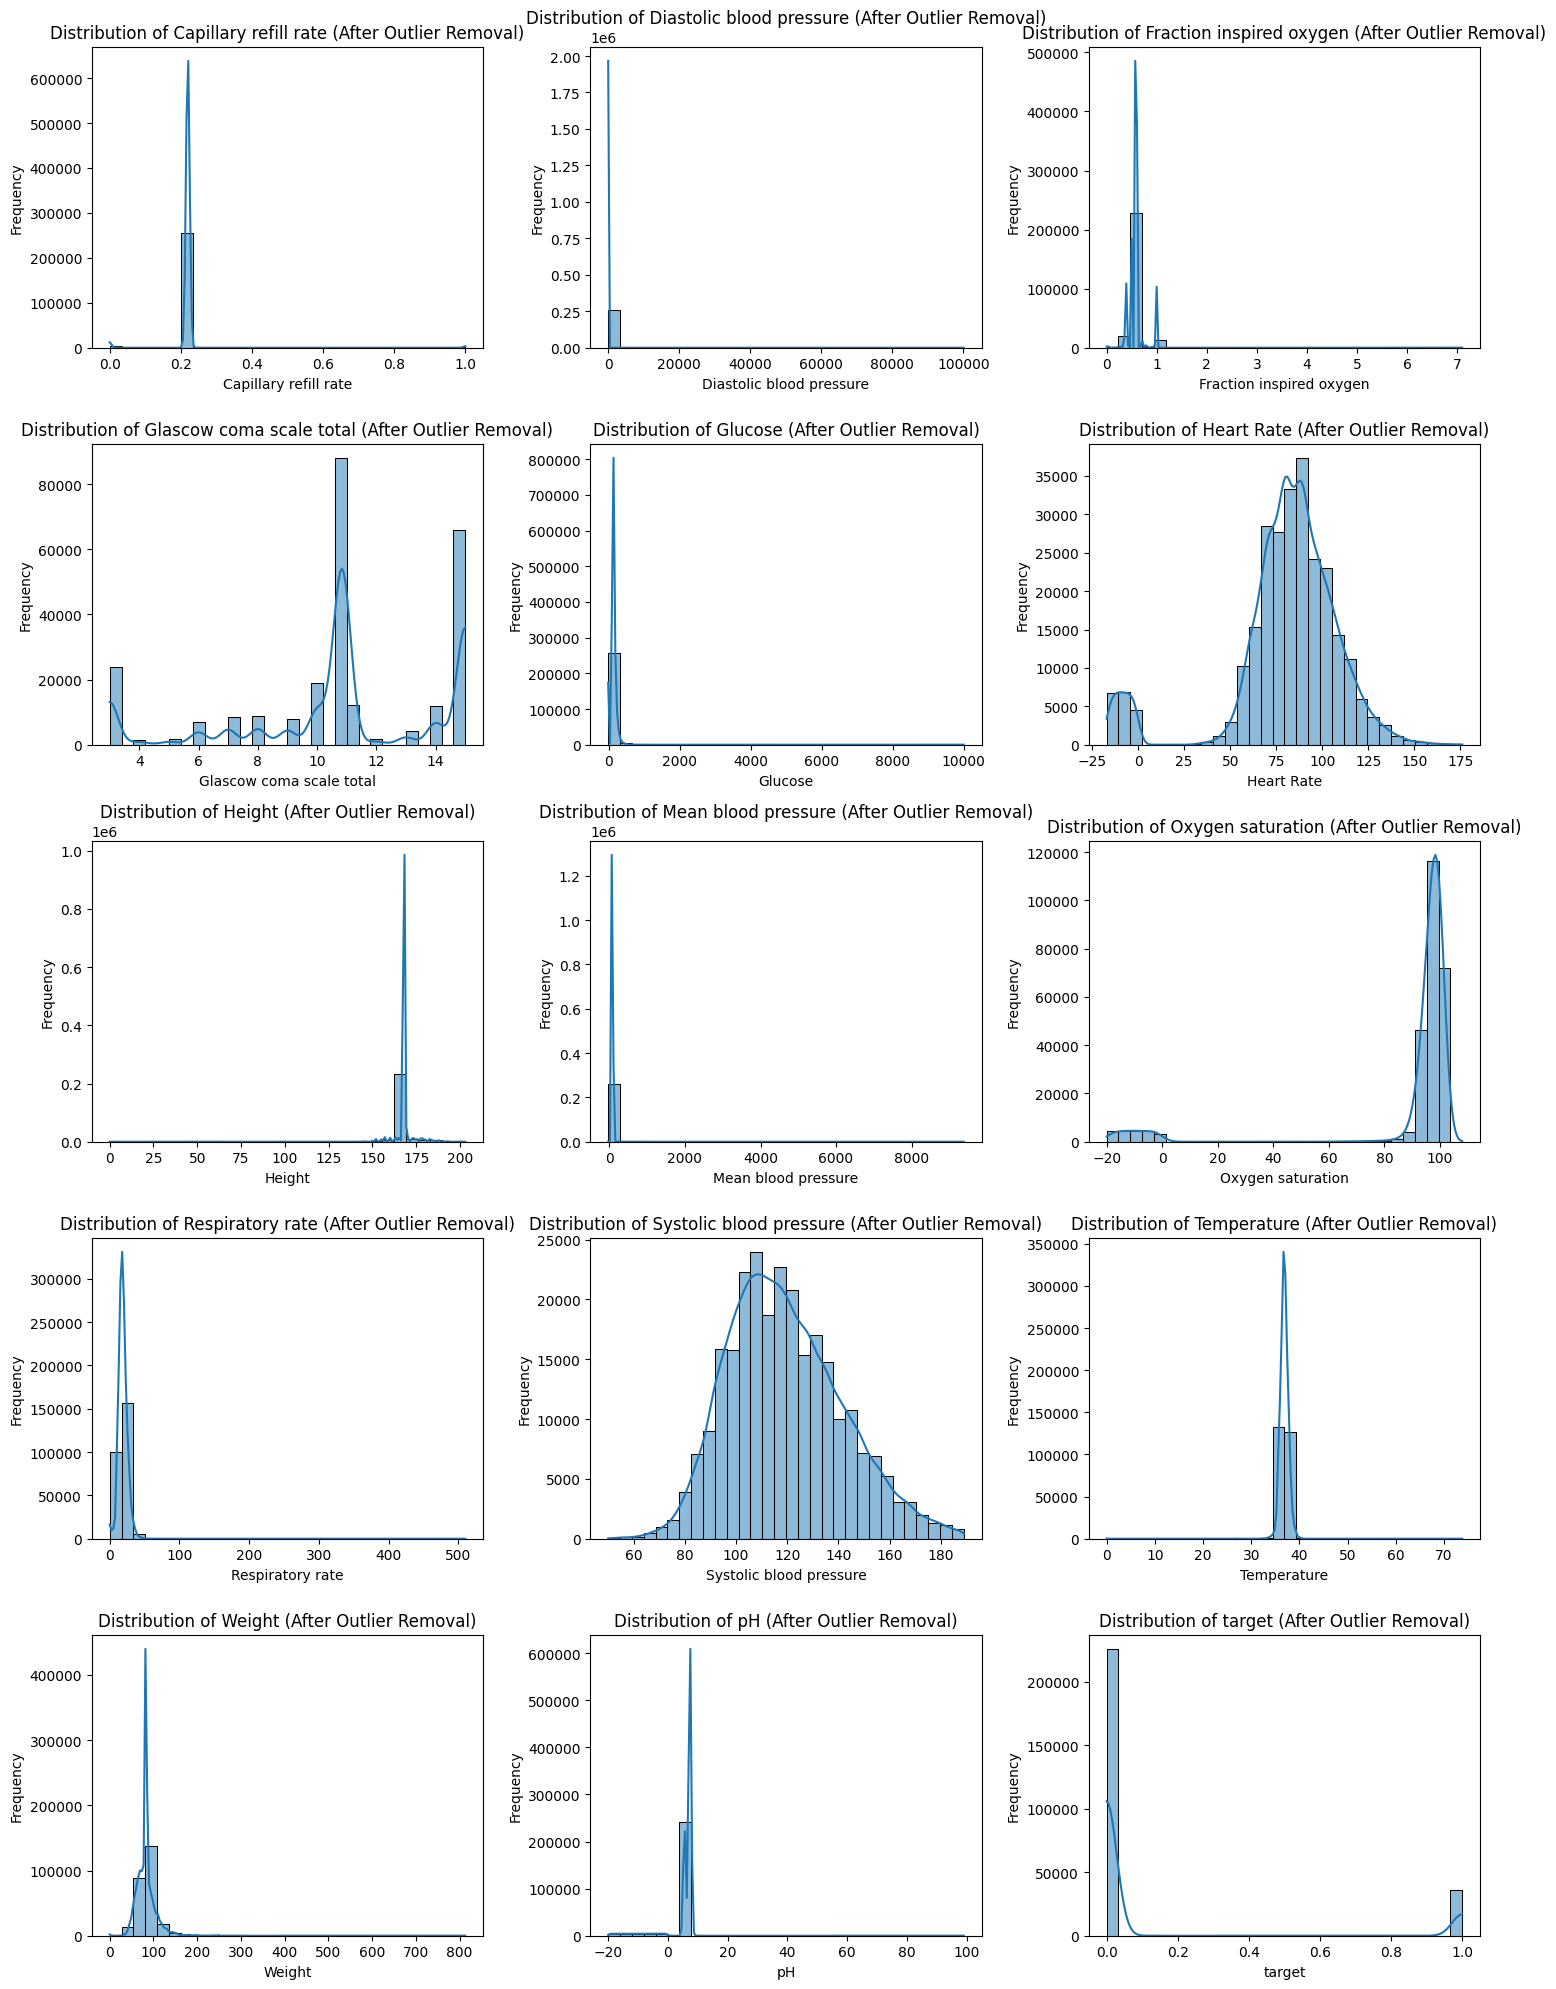

In [18]:
# Create subplots for distributions
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

# Loop through numerical variables and plot distributions
for i, var in enumerate(numerical_vars):
    sns.histplot(data_no_outliers[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} (After Outlier Removal)")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
# Step 7: Post-Processing Statistical Description
print("\nPost-Processing Statistical Description of Numerical Variables:")
print(data_no_outliers[numerical_vars].describe())


Post-Processing Statistical Description of Numerical Variables:
       Capillary refill rate  Diastolic blood pressure  \
count          262072.000000             262072.000000   
mean                0.219769                 62.409465   
std                 0.062546                363.199000   
min                 0.000000                  0.000000   
25%                 0.219769                 51.000000   
50%                 0.219769                 59.000000   
75%                 0.219769                 69.000000   
max                 1.000000             100105.010000   

       Fraction inspired oxygen  Glascow coma scale total        Glucose  \
count             262072.000000             262072.000000  262072.000000   
mean                   0.587649                 10.818384     129.791516   
std                    0.124755                  3.533589      85.756530   
min                    0.000000                  3.000000     -19.999974   
25%                    0.587649 

## Advantages and Disadvantages Analysis

Advantages of the Preprocessing Process:
1. Improved data quality by handling missing values and outliers.
2. Enhanced statistical validity of analyses performed on the dataset.
3. Removal of incomplete or erroneous data reduces noise in machine learning models.

##Disadvantages of the Preprocessing Process:
1. Removal of rows with missing or outlier values may result in data loss - what appears to be an outlier might carry important information
2. Assumptions made during imputation or outlier removal may introduce bias.